In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import random
import json
# Import API key
import api_keys

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#Random selection of latitude and longitude 

lat = np.random.choice(range(-90,90),2000)
lng = np.random.choice(range(-180,180),2000)

lat_lng = pd.DataFrame({"Lat":lat,"Long":lng})        

#print(len(lat_lng)
lat_lng.head()

,Lat,Long
0,1,14
1,-6,-165
2,1,124
3,54,62
4,-57,-9


In [3]:
#Use citipy to merge them to nearest city
#Create new columns for the city name: 
lat_lng["city_name"] = ""
lat_lng["country"] = ""
#LatLon.head()
for index,row in lat_lng.iterrows():
    city = citipy.nearest_city(row["Lat"],row["Long"])
    lat_lng.set_value(index,"city_name",city.city_name)
    lat_lng.set_value(index,"country",city.country_code)

print(f"The length of the dataframe is: {len(lat_lng)}")

/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  if __name__ == '__main__':


The length of the dataframe is: 2000


In [4]:
#Randomly select **at least** 500 unique (non-repeat) cities based on latitude and longitude 

#Clean it for missing values
nr_lat_lng = lat_lng.dropna()
print(f"The length of the cleaned dataframe is:{len(nr_lat_lng)}")


nr_lat_lng = nr_lat_lng.drop_duplicates()
print(f"The length of the dataframe after dropping the duplicates is: {len(nr_lat_lng)}")

# Sample for "at least" 500 cities 
sample = nr_lat_lng.sample(750)
sample =sample.reset_index()
sample = sample.iloc[:,[1,2,3,4]]
print(f"The length of the sample is: {len(sample)}")

sample.head()

The length of the cleaned dataframe is:2000
The length of the dataframe after dropping the duplicates is: 1968
The length of the sample is: 750


,Lat,Long,city_name,country
0,1,-53,mazagao,br
1,-77,-160,mataura,pf
2,-32,65,mahebourg,mu
3,-86,-67,ushuaia,ar
4,10,40,abomsa,et


## Perform API Calls

In [11]:
# OpenWeatherMap API Key
url = "http://api.openweathermap.org/data/2.5/weather?"
params = { "appid" :api_key,"units":"imperial" }

#Print the base url 

print("-----------------------------------------")
print("Beginning Data Retrieval")
print("-----------------------------------------\n")

for index,row in sample.iterrows():
    params["q"] =f'{row["city_name"]},{row["country"]}'
    print(f"Processing Record {index+1} of {len(sample)}")
    response = requests.get(url,params)
    print(response.url)
    formatted_response = response.json()
    sample.set_value(index,"Latitude",formatted_response.get("coord",{}).get("lat"))
    sample.set_value(index,"Longitude",formatted_response.get("coord",{}).get("lon"))
    sample.set_value(index,"Temperature",formatted_response.get("main",{}).get("temp"))
    sample.set_value(index,"Humidity",formatted_response.get("main",{}).get("humidity"))
    sample.set_value(index,"Wind speed",formatted_response.get("wind",{}).get("speed"))
    sample.set_value(index,"Cloudiness",formatted_response.get("clouds",{}).get("all"))
    sample.set_value(index,"Date",formatted_response.get("dt"))

print("-----------------------------------------")
print("Data Retrieval Complete")
print("-----------------------------------------")


-----------------------------------------
Beginning Data Retrieval
-----------------------------------------

Processing Record 1 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mazagao%2Cbr
Processing Record 2 of 750


/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:18: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:19: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:20: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
/anaconda3/envs/PythonData/lib/python3.6/site-packages/ipykernel_launcher.py:21: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mataura%2Cpf
Processing Record 3 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mahebourg%2Cmu
Processing Record 4 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=ushuaia%2Car
Processing Record 5 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=abomsa%2Cet
Processing Record 6 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mataura%2Cpf
Processing Record 7 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=rikitea%2Cpf
Processing Record 8 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=tiksi%2Cru
Processing Record 9 of 750


http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=padang%2Cid
Processing Record 61 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=konstantinovka%2Cru
Processing Record 62 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=sisimiut%2Cgl
Processing Record 63 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=punta+arenas%2Ccl
Processing Record 64 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mataura%2Cpf
Processing Record 65 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=busselton%2Cau
Processing Record 66 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=nikolskoye%2Cru
Pro

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=albany%2Cau
Processing Record 119 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=hobart%2Cau
Processing Record 120 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=arraial+do+cabo%2Cbr
Processing Record 121 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=katangli%2Cru
Processing Record 122 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=conceicao+da+barra%2Cbr
Processing Record 123 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=castro%2Ccl
Processing Record 124 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kavaratti%

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=la+ronge%2Cca
Processing Record 177 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=krasnozerskoye%2Cru
Processing Record 178 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mataura%2Cpf
Processing Record 179 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kodiak%2Cus
Processing Record 180 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kaeo%2Cnz
Processing Record 181 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=albany%2Cau
Processing Record 182 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=busselton%2Cau
Processin

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=belushya+guba%2Cru
Processing Record 234 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kavieng%2Cpg
Processing Record 235 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=lorengau%2Cpg
Processing Record 236 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mar+del+plata%2Car
Processing Record 237 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=butaritari%2Cki
Processing Record 238 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=hithadhoo%2Cmv
Processing Record 239 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=luderitz%

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=san+cristobal%2Cec
Processing Record 290 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=umm+kaddadah%2Csd
Processing Record 291 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kahului%2Cus
Processing Record 292 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=banda+aceh%2Cid
Processing Record 293 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=cabo+san+lucas%2Cmx
Processing Record 294 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=taolanaro%2Cmg
Processing Record 295 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=zays

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=jamestown%2Csh
Processing Record 346 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=tasiilaq%2Cgl
Processing Record 347 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=nishiwaki%2Cjp
Processing Record 348 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=tumannyy%2Cru
Processing Record 349 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=santa+engracia%2Cmx
Processing Record 350 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=punta+arenas%2Ccl
Processing Record 351 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=waingapu%

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=geraldton%2Cau
Processing Record 402 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=jinka%2Cet
Processing Record 403 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=ushuaia%2Car
Processing Record 404 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=geraldton%2Cau
Processing Record 405 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=beringovskiy%2Cru
Processing Record 406 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=ashland%2Cus
Processing Record 407 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mamallapuram%2Cin
Pr

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=dunedin%2Cnz
Processing Record 458 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=beian%2Ccn
Processing Record 459 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mataura%2Cpf
Processing Record 460 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=abu+samrah%2Cqa
Processing Record 461 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=samarai%2Cpg
Processing Record 462 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=te+anau%2Cnz
Processing Record 463 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kalabo%2Czm
Processing Rec

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=chuy%2Cuy
Processing Record 514 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=taolanaro%2Cmg
Processing Record 515 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=villa+constitucion%2Car
Processing Record 516 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=avarua%2Cck
Processing Record 517 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kodiak%2Cus
Processing Record 518 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=rikitea%2Cpf
Processing Record 519 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=punta+arenas%2Ccl
P

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=sao+joao+da+barra%2Cbr
Processing Record 570 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=port+alfred%2Cza
Processing Record 571 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=rikitea%2Cpf
Processing Record 572 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kudahuvadhoo%2Cmv
Processing Record 573 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=vaini%2Cto
Processing Record 574 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=tiksi%2Cru
Processing Record 575 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=illoqqortoor

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mafeteng%2Cls
Processing Record 626 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=sinnamary%2Cgf
Processing Record 627 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=maralal%2Cke
Processing Record 628 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=port+alfred%2Cza
Processing Record 629 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=lebu%2Ccl
Processing Record 630 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=halalo%2Cwf
Processing Record 631 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=katherine%2Cau
Processin

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=kaitangata%2Cnz
Processing Record 683 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=bambous+virieux%2Cmu
Processing Record 684 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=qaanaaq%2Cgl
Processing Record 685 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=albany%2Cau
Processing Record 686 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=fortuna%2Cus
Processing Record 687 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=mar+del+plata%2Car
Processing Record 688 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=busselton%2

http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=tuktoyaktuk%2Cca
Processing Record 741 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=dingle%2Cie
Processing Record 742 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=albany%2Cau
Processing Record 743 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=arraial+do+cabo%2Cbr
Processing Record 744 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=taolanaro%2Cmg
Processing Record 745 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=hobart%2Cau
Processing Record 746 of 750
http://api.openweathermap.org/data/2.5/weather?appid=ed450a57a786ae57808c2212e491b879&units=imperial&q=georgetown%2Csh


In [23]:
#Clean the retrieved data
sample = sample.dropna()
#Create a dataframe
weatherPy = pd.DataFrame({"city_name":sample["city_name"],
                          "country":sample["country"],
                         "cloudiness":sample["Cloudiness"],
                         "humidity":sample["Humidity"],
                         "lat":sample["Latitude"],
                         "lng":sample["Longitude"],
                        "temperature":sample["Temperature"],
                         "wind speed":sample["Wind speed"],})

# Save as CSV
weatherPy.to_csv("weatherPy.csv")

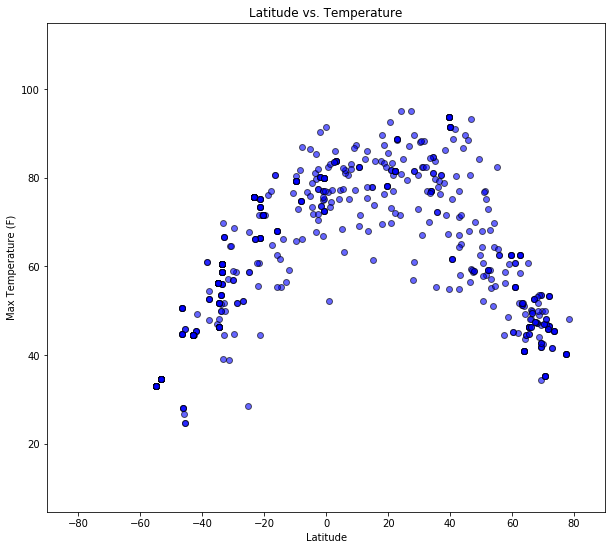

In [29]:
#Analysis: Temperature (F) vs. Latitude

fig, ax = plt.subplots(figsize=(10, 9))
ax.scatter(weatherPy['lat'], weatherPy['temperature'], c='blue',alpha=.6, linewidth=1, edgecolor='black')

#Set x and y limits, title, labels
ax.set_xlim(-90, 90)
ax.set_ylim(min(weatherPy['temperature'])-20, max(weatherPy['temperature'])+20)
ax.set_xlabel("Latitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_title("Latitude vs. Temperature")

# Save png images for each scatter plot.
plt.savefig("CityLat-MaxTemp-03.17.18.png")
plt.show()